In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum()
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [4]:
df_cleaned = df.dropna()
print("\nDataset after Removing Null Values:")
print(df_cleaned.isnull().sum())


Dataset after Removing Null Values:
index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
New                   0
PendingS              0
dtype: int64


In [5]:
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"\nDataset Shape after Removing Duplicates: {df_cleaned.shape}")


Number of Duplicate Rows: 0

Dataset Shape after Removing Duplicates: (0, 21)


In [6]:
# Final Cleaned Dataset
print("\nFinal Cleaned Dataset:")
print(df_cleaned.info())


Final Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               0 non-null      int64  
 1   Order ID            0 non-null      object 
 2   Date                0 non-null      object 
 3   Status              0 non-null      object 
 4   Fulfilment          0 non-null      object 
 5   Sales Channel       0 non-null      object 
 6   ship-service-level  0 non-null      object 
 7   Category            0 non-null      object 
 8   Size                0 non-null      object 
 9   Courier Status      0 non-null      object 
 10  Qty                 0 non-null      int64  
 11  currency            0 non-null      object 
 12  Amount              0 non-null      float64
 13  ship-city           0 non-null      object 
 14  ship-state          0 non-null      object 
 15  ship-postal-code    0 non-null      float64
 16  s

In [ ]:
# Ensure 'Amount' column is numeric and 'Product Category' column exists
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Amount','Category', 'Fulfilment'])  # Ensure no NaNs in key columns
# Total Sales by Product Category
category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False) 
product_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
top_categories = category_sales.head(10)
top_products = product_sales.head(10)

In [ ]:
# Satatistics for top 10 selling products
top_products_stats = {
    "Total Sales (Top 10)": top_products.sum(),
    "Average Sales (Top 10)": top_products.mean(),
    "Max Sales (Top 10)": top_products.max(),
    "Min Sales (Top 10)": top_products.min(),
    "Std Dev Sales (Top 10)": top_products.std()
}

print("\nStatistics for Top 10 Products:")
for key, value in top_products_stats.items():
    print(f"{key}: {value:.2f}")



Statistics for Top 10 Products:
Total Sales (Top 10): 78590170.25
Average Sales (Top 10): 8732241.14
Max Sales (Top 10): 39206756.65
Min Sales (Top 10): 915.00
Std Dev Sales (Top 10): 13508004.16


In [ ]:
#  NumPy Percentiles for Top 10 Products
product_sales_array = top_products.values
percentiles = {
    "25th Percentile": np.percentile(product_sales_array, 25),
    "50th Percentile (Median)": np.percentile(product_sales_array, 50),
    "75th Percentile": np.percentile(product_sales_array, 75),
    "Variance": np.var(product_sales_array),
    "Coefficient of Variation": np.std(product_sales_array) / np.mean(product_sales_array)
}

print("\nNumPy Analysis for Top 10 Products:")
for key, value in percentiles.items():
    print(f"{key}: {value:.2f}")


NumPy Analysis for Top 10 Products:
25th Percentile: 150757.50
50th Percentile (Median): 789419.66
75th Percentile: 11215104.12
Variance: 162192156735420.38
Coefficient of Variation: 1.46


 Visualization

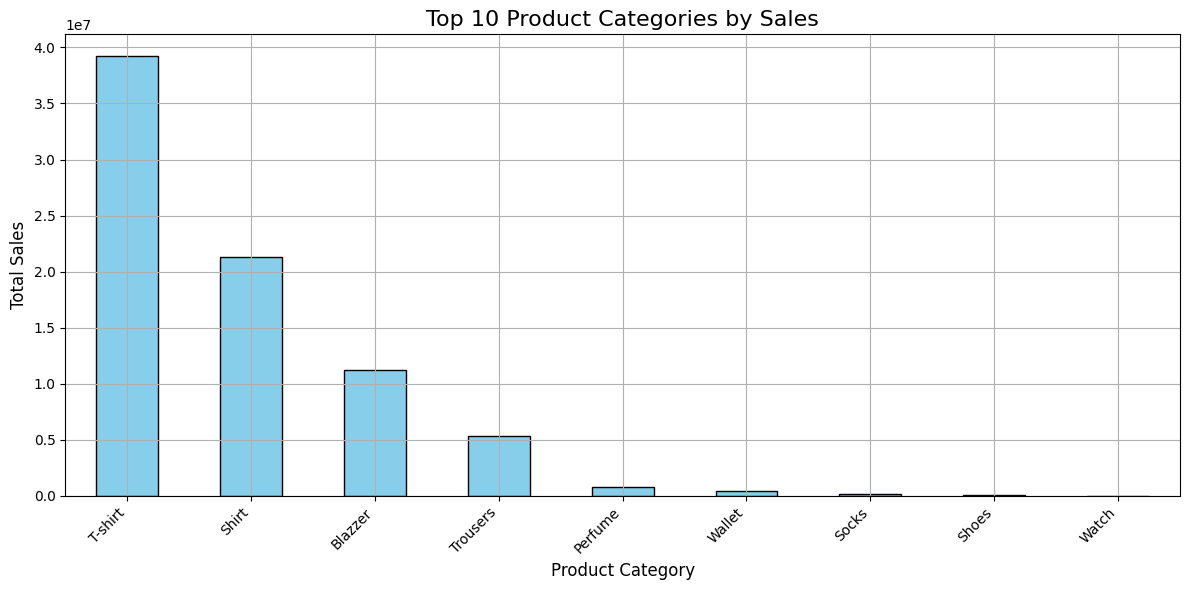

In [ ]:
# Bar Graph: Top 10 Product Categories by Sales
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Product Categories by Sales", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

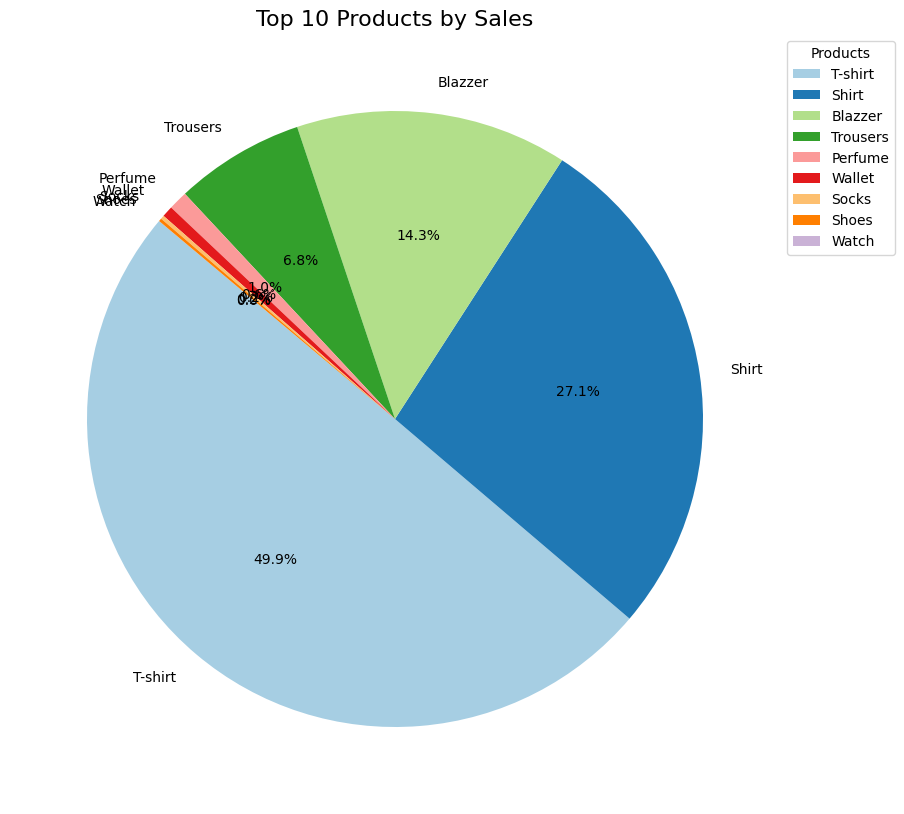

In [ ]:
# Pie Chart: Top 10 Products by Sales
plt.figure(figsize=(12, 10))
plt.pie(
    top_products.values, 
    labels=top_products.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Top 10 Products by Sales", fontsize=16)
plt.legend(top_products.index,
        title="Products",
        loc="upper left",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()